In [14]:
import pystan
import pandas as pd
from bayesian_analysis import BayesianAnalysis, BayesianRevenue, BayesianConversion
from bayesian_testing import BayesianTesting

In [15]:
#if the metric is a conversion metric

In [16]:
# Example:
df = pd.read_csv('../sevenpack/data/xp_432_cvr.csv')

In [17]:
sm_conversion = pystan.StanModel(file='conversion_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Conversion'
stan_model = sm_conversion
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(df)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4d81218ddedd2117198748e31e848d70 NOW.


In [18]:
stats

[([('show',
    array([1.07425688e-07, 5.39592929e-07, 1.42499408e-06, 3.15654352e-06,
           7.19328593e-06])),
   ('control',
    array([2.41364015e-07, 9.29717609e-07, 1.96532044e-06, 3.76530923e-06,
           7.95324981e-06]))],
  [('show', 0.41), ('control', 0.59)],
  [('show', 1.5043012698082947e-06), ('control', 9.917588770221643e-07)])]

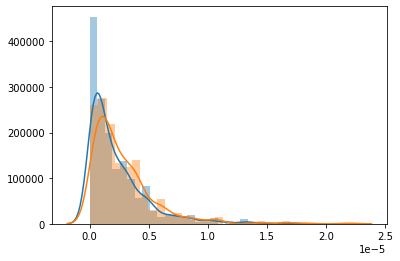

In [22]:
import seaborn as sns
bucket, res_lists = zip(*posteriors)
sns.distplot(res_lists[0])
sns.distplot(res_lists[1])

In [10]:
#if the metric is a revenue metric

In [23]:
# Example:
df = pd.read_csv('../sevenpack/data/exp_385.csv')

In [32]:
date_range = pd.date_range(start = '2020-01-07 00:00:00', periods = 45)

In [29]:
df['participation_timestamp_rounded_up'].sort_values()

3639517    2020-01-07 00:00:00
2944612    2020-01-07 00:00:00
3364735    2020-01-07 00:00:00
2249968    2020-01-07 00:00:00
3748078    2020-01-07 00:00:00
                  ...         
125444     2020-03-07 00:00:00
4010018    2020-03-07 00:00:00
1108100    2020-03-07 00:00:00
2366016    2020-03-07 00:00:00
3296544    2020-03-07 00:00:00
Name: participation_timestamp_rounded_up, Length: 4776136, dtype: object

## DAY 1

In [36]:
from pandas import Timestamp
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[1]
subxp = df[idx]

In [37]:
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [59]:
p_stats = []
l_stats = []
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [63]:
l_stats[0]

[('show_modal_forced_selection', 0.5965213591510645),
 ('show_modal_optional_selection', 1.9967878402578696),
 ('control', 0.3679753583121014)]

Text(0.5, 0, 'gtv_per_participant')

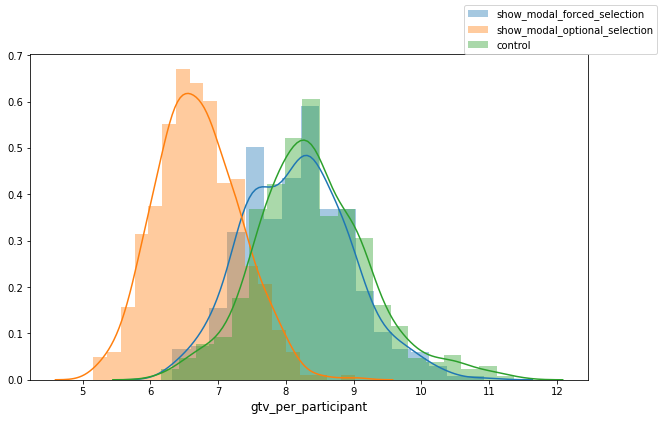

In [50]:
import matplotlib.pyplot as plt
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [64]:
# Day 2
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[2]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [66]:
stats

[([('control',
    array([6.41172737, 6.73332643, 6.97409395, 7.17950322, 7.51004494])),
   ('show_modal_optional_selection',
    array([5.65942491, 5.98878408, 6.1736996 , 6.36431672, 6.70921257])),
   ('show_modal_forced_selection',
    array([5.61084715, 5.92870633, 6.1199751 , 6.33750995, 6.67303138]))],
  [('control', 0.95),
   ('show_modal_optional_selection', 0.05),
   ('show_modal_forced_selection', 0.032)],
  [('control', 0.019955292304276537),
   ('show_modal_optional_selection', 0.8076085834665603),
   ('show_modal_forced_selection', 0.8563458674139814)])]

Text(0.5, 0, 'gtv_per_participant')

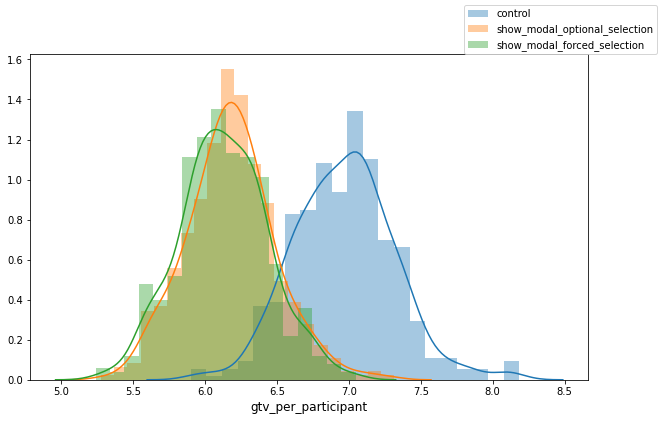

In [65]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [67]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [69]:
# Day 3
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[3]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [70]:
stats

[([('control',
    array([6.11121147, 6.35458817, 6.49700037, 6.66812518, 6.93751305])),
   ('show_modal_forced_selection',
    array([5.79414489, 6.00788893, 6.17244796, 6.33886965, 6.57097661])),
   ('show_modal_optional_selection',
    array([5.62664056, 5.82355532, 5.99051208, 6.15890516, 6.43406113]))],
  [('control', 0.846),
   ('show_modal_forced_selection', 0.154),
   ('show_modal_optional_selection', 0.068)],
  [('control', 0.03756233868874694),
   ('show_modal_forced_selection', 0.37505257608509057),
   ('show_modal_optional_selection', 0.5517460100880307)])]

Text(0.5, 0, 'gtv_per_participant')

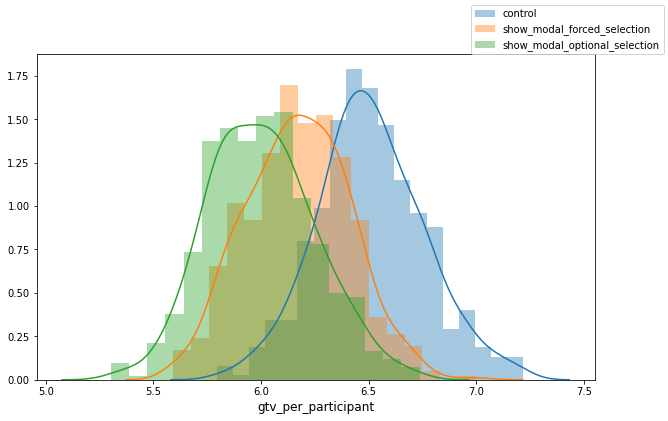

In [71]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [72]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [73]:
# Day 4
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[4]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [74]:
stats

[([('control',
    array([6.12977331, 6.33627936, 6.47395141, 6.62164528, 6.83561375])),
   ('show_modal_forced_selection',
    array([5.8779763 , 6.0730077 , 6.22693054, 6.36477541, 6.58356629])),
   ('show_modal_optional_selection',
    array([5.80770345, 5.9929508 , 6.12688168, 6.27861515, 6.48546103]))],
  [('control', 0.764),
   ('show_modal_forced_selection', 0.236),
   ('show_modal_optional_selection', 0.132)],
  [('control', 0.05113163712251155),
   ('show_modal_forced_selection', 0.3070294004697057),
   ('show_modal_optional_selection', 0.3956791243093475)])]

Text(0.5, 0, 'gtv_per_participant')

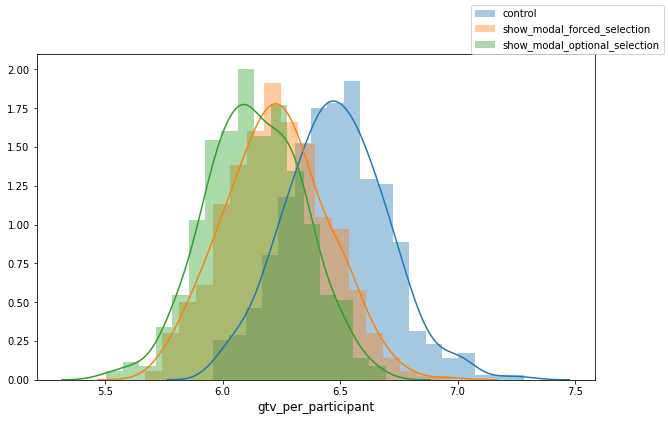

In [75]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [76]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [78]:
# Day 5
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[5]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [80]:
stats

[([('control',
    array([6.40684912, 6.56755467, 6.68734308, 6.79650637, 6.99565247])),
   ('show_modal_forced_selection',
    array([6.43367123, 6.61911589, 6.74725209, 6.88632228, 7.06932817])),
   ('show_modal_optional_selection',
    array([6.06738368, 6.2393264 , 6.34198353, 6.44953673, 6.61798654]))],
  [('control', 0.42),
   ('show_modal_forced_selection', 0.58),
   ('show_modal_optional_selection', 0.066)],
  [('control', 0.13982808006217567),
   ('show_modal_forced_selection', 0.07794084363139979),
   ('show_modal_optional_selection', 0.4859102816839941)])]

In [79]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [81]:
# Day 6
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[6]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [82]:
stats

[([('control',
    array([6.64145708, 6.79910491, 6.90159673, 7.00427053, 7.15807973])),
   ('show_modal_forced_selection',
    array([6.43980906, 6.59428794, 6.70725868, 6.82372297, 6.99370151])),
   ('show_modal_optional_selection',
    array([6.0796349 , 6.24461625, 6.34666049, 6.47024761, 6.61111   ]))],
  [('control', 0.762),
   ('show_modal_forced_selection', 0.238),
   ('show_modal_optional_selection', 0.006)],
  [('control', 0.031101343763022708),
   ('show_modal_forced_selection', 0.21972101818857037),
   ('show_modal_optional_selection', 0.5728474073051061)])]

In [83]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [84]:
# Day 7
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[7]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


Text(0.5, 0, 'gtv_per_participant')

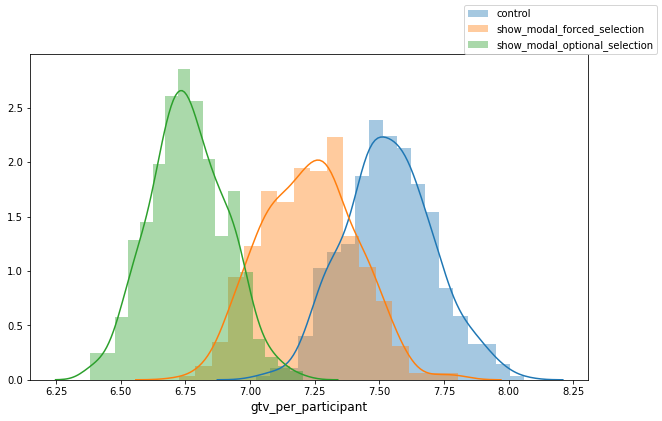

In [87]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [85]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [86]:
stats

[([('control',
    array([7.26700097, 7.42414231, 7.53427456, 7.64546658, 7.83661574])),
   ('show_modal_forced_selection',
    array([6.93497501, 7.09056325, 7.22927076, 7.34857494, 7.51894104])),
   ('show_modal_optional_selection',
    array([6.52637195, 6.65982902, 6.75113616, 6.86033435, 6.99331826]))],
  [('control', 0.886),
   ('show_modal_forced_selection', 0.114),
   ('show_modal_optional_selection', 0.0)],
  [('control', 0.012887190476150204),
   ('show_modal_forced_selection', 0.32117001205374207),
   ('show_modal_optional_selection', 0.786633411076164)])]

In [88]:
# Day 8
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[8]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


Text(0.5, 0, 'gtv_per_participant')

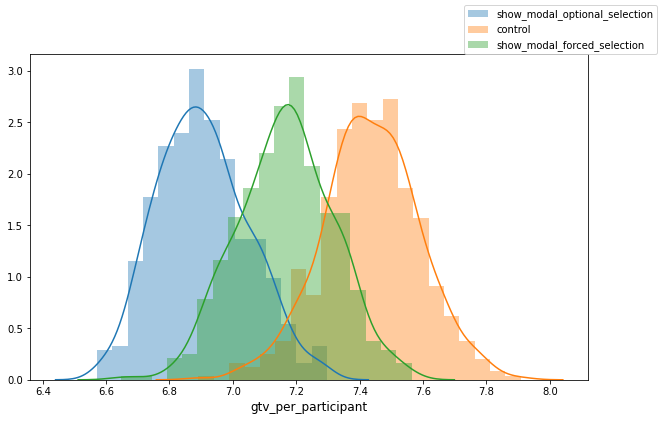

In [89]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [90]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [91]:
# Day 9
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[9]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [92]:
stats

[([('show_modal_optional_selection',
    array([6.51472938, 6.62873618, 6.73347698, 6.82136651, 6.96247985])),
   ('control',
    array([6.87539319, 7.00359735, 7.11464875, 7.21281426, 7.3438337 ])),
   ('show_modal_forced_selection',
    array([6.65186562, 6.77131174, 6.86866646, 6.95023703, 7.10391174]))],
  [('show_modal_optional_selection', 0.028),
   ('control', 0.89),
   ('show_modal_forced_selection', 0.11)],
  [('show_modal_optional_selection', 0.39629206468920664),
   ('control', 0.013265622210966744),
   ('show_modal_forced_selection', 0.25815854138480143)])]

Text(0.5, 0, 'gtv_per_participant')

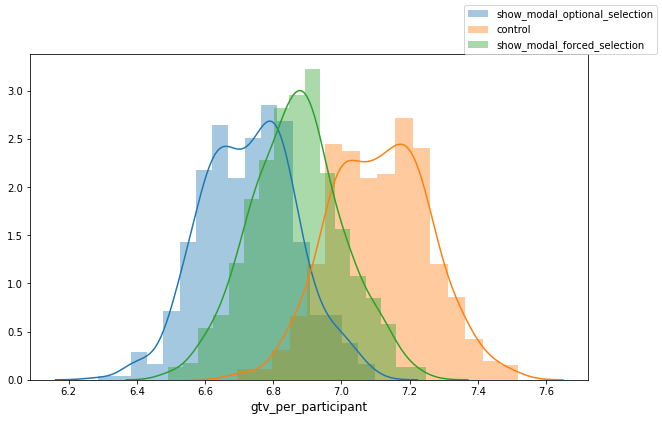

In [94]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [93]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [95]:
# Day 10
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[10]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [96]:
stats

[([('show_modal_optional_selection',
    array([6.45912955, 6.56497629, 6.65137989, 6.72864869, 6.85787244])),
   ('control',
    array([6.83795012, 6.94575576, 7.03581522, 7.11910532, 7.24676145])),
   ('show_modal_forced_selection',
    array([6.62821342, 6.74119874, 6.82716988, 6.92748642, 7.05237513]))],
  [('show_modal_optional_selection', 0.02),
   ('control', 0.868),
   ('show_modal_forced_selection', 0.132)],
  [('show_modal_optional_selection', 0.4044362628429018),
   ('control', 0.014147474742734745),
   ('show_modal_forced_selection', 0.21866490120913704)])]

Text(0.5, 0, 'gtv_per_participant')

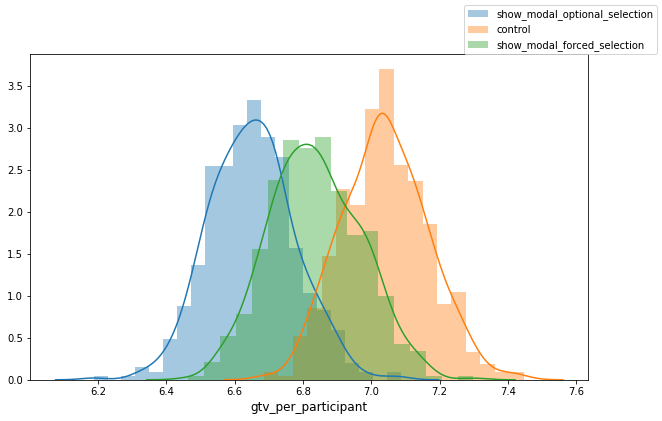

In [97]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [98]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [99]:
# Day 11
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[11]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [100]:
stats

[([('show_modal_optional_selection',
    array([6.39649088, 6.51171676, 6.58786818, 6.66380253, 6.81021035])),
   ('control',
    array([6.71709015, 6.82943175, 6.90926696, 6.99362359, 7.11863305])),
   ('show_modal_forced_selection',
    array([6.54367126, 6.65010186, 6.7447224 , 6.82059716, 6.92629776]))],
  [('show_modal_optional_selection', 0.034),
   ('control', 0.856),
   ('show_modal_forced_selection', 0.144)],
  [('show_modal_optional_selection', 0.33711400645939843),
   ('control', 0.016010138917438136),
   ('show_modal_forced_selection', 0.190214265578477)])]

Text(0.5, 0, 'gtv_per_participant')

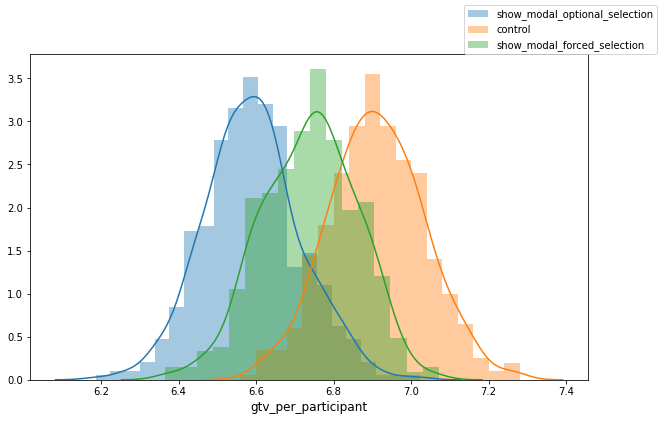

In [101]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [102]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [103]:
# Day 12
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[12]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [104]:
stats

[([('show_modal_optional_selection',
    array([6.44010517, 6.54874258, 6.62278297, 6.68928009, 6.795086  ])),
   ('control',
    array([6.78556519, 6.90306464, 6.99403061, 7.08001735, 7.20130919])),
   ('show_modal_forced_selection',
    array([6.57234657, 6.67444258, 6.7445502 , 6.81049841, 6.92375434]))],
  [('show_modal_optional_selection', 0.006),
   ('control', 0.928),
   ('show_modal_forced_selection', 0.072)],
  [('show_modal_optional_selection', 0.37539720020959516),
   ('control', 0.005165101287294361),
   ('show_modal_forced_selection', 0.2518462821938638)])]

Text(0.5, 0, 'gtv_per_participant')

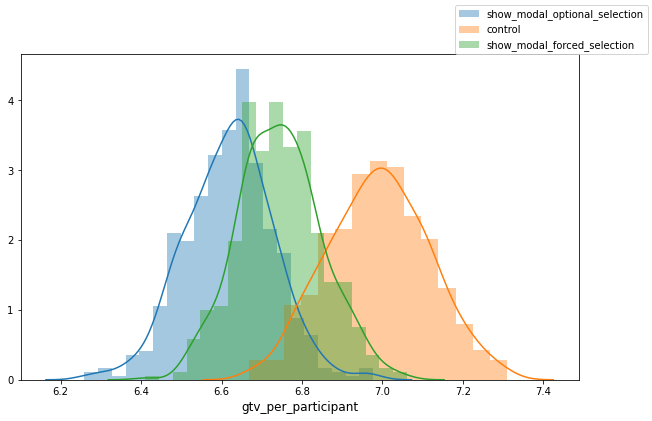

In [105]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [106]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [107]:
# Day 13
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[13]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [108]:
stats

[([('show_modal_optional_selection',
    array([6.41856268, 6.53129906, 6.59791857, 6.67403311, 6.78411435])),
   ('control',
    array([6.83566966, 6.95050878, 7.01724964, 7.09328902, 7.2088576 ])),
   ('show_modal_forced_selection',
    array([6.57227426, 6.67993193, 6.74412254, 6.82388475, 6.90754622]))],
  [('show_modal_optional_selection', 0.002),
   ('control', 0.974),
   ('show_modal_forced_selection', 0.026)],
  [('show_modal_optional_selection', 0.42103036922563625),
   ('control', 0.0016153011800812346),
   ('show_modal_forced_selection', 0.27805385077766415)])]

Text(0.5, 0, 'gtv_per_participant')

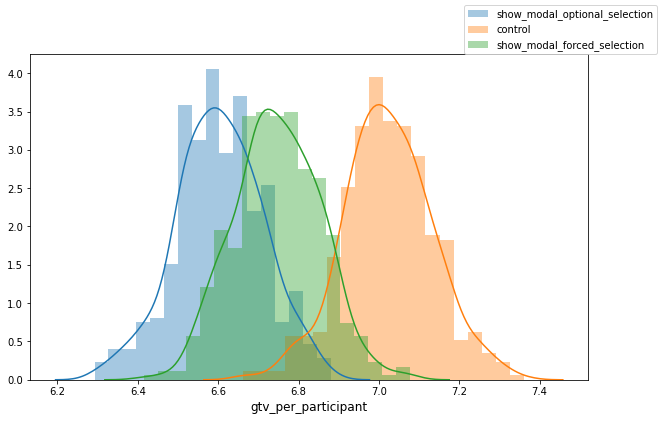

In [109]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [110]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [111]:
# Day 14
idx = pd.to_datetime(df['participation_timestamp_rounded_up']) < date_range[14]
subxp = df[idx]
sm_revenue = pystan.StanModel(file='revenue_model.stan')

column_for_data_analysis = 'data'
analysis_type = 'Bayesian-Revenue'
stan_model = sm_revenue
prior_alpha = 1
prior_beta = 1

bt = BayesianTesting(column_for_data_analysis, analysis_type, 
                     stan_model, prior_alpha, prior_beta)

posteriors = bt._generate_bucket_posteriors(subxp)
stats = bt._generate_test_statistics(posteriors)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e10b5aaf0bda8c3fd55c449a8894ff67 NOW.


In [112]:
stats

[([('show_modal_optional_selection',
    array([6.47208103, 6.58464187, 6.65817837, 6.74006755, 6.8314352 ])),
   ('control',
    array([7.03921744, 7.13426947, 7.19319193, 7.27128322, 7.36696971])),
   ('show_modal_forced_selection',
    array([6.62200097, 6.71398155, 6.78198889, 6.8500232 , 6.94047231]))],
  [('show_modal_optional_selection', 0.0),
   ('control', 0.996),
   ('show_modal_forced_selection', 0.004)],
  [('show_modal_optional_selection', 0.5384688545620602),
   ('control', 0.00024437552877515855),
   ('show_modal_forced_selection', 0.41746725073047203)])]

Text(0.5, 0, 'gtv_per_participant')

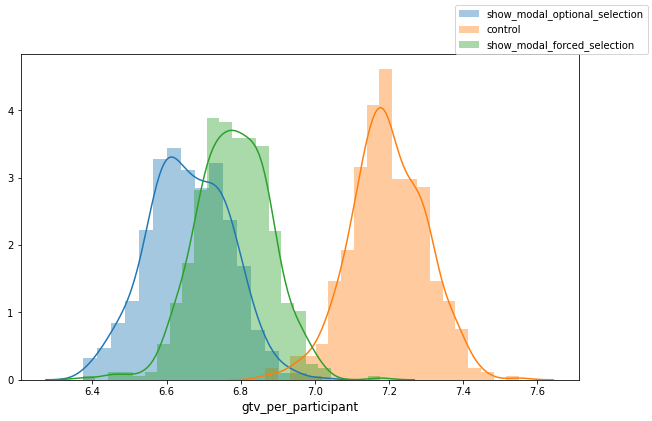

In [113]:
buckets, res_lists = zip(*posteriors)
fig = plt.figure(figsize=(10,6))
for res in res_lists:
    sns.distplot(res)

fig.legend(labels=buckets)
plt.xlabel('gtv_per_participant', fontsize= 12)

In [114]:
pval = stats[0][1]
p_stats.append(pval)
loss = stats[0][2]
l_stats.append(loss)

In [126]:
pd.DataFrame(l_stats)

,0,1,2
0,"(show_modal_forced_selection, 0.5965213591510645)","(show_modal_optional_selection, 1.996787840257...","(control, 0.3679753583121014)"
1,"(control, 0.019955292304276537)","(show_modal_optional_selection, 0.807608583466...","(show_modal_forced_selection, 0.8563458674139814)"
2,"(control, 0.03756233868874694)","(show_modal_forced_selection, 0.37505257608509...","(show_modal_optional_selection, 0.551746010088..."
3,"(control, 0.05113163712251155)","(show_modal_forced_selection, 0.3070294004697057)","(show_modal_optional_selection, 0.395679124309..."
4,"(control, 0.13982808006217567)","(show_modal_forced_selection, 0.07794084363139...","(show_modal_optional_selection, 0.485910281683..."
5,"(control, 0.031101343763022708)","(show_modal_forced_selection, 0.21972101818857...","(show_modal_optional_selection, 0.572847407305..."
6,"(control, 0.012887190476150204)","(show_modal_forced_selection, 0.32117001205374...","(show_modal_optional_selection, 0.786633411076..."
7,"(show_modal_optional_selection, 0.53825542130198)","(control, 0.010465879908046458)","(show_modal_forced_selection, 0.27986997735349..."
8,"(show_modal_optional_selection, 0.396292064689...","(control, 0.013265622210966744)","(show_modal_forced_selection, 0.25815854138480..."
9,"(show_modal_optional_selection, 0.404436262842...","(control, 0.014147474742734745)","(show_modal_forced_selection, 0.21866490120913..."


In [122]:
len(l_stats)

14

In [146]:
lossdf = pd.DataFrame()
day =0
for l in l_stats:
    day +=1
    b, loss = zip(*l)
    d = {'bucket':b,'loss':loss}
    dfi = pd.DataFrame(d)
    dfi['day'] = day
    lossdf = pd.concat([lossdf,dfi])

Text(0.5, 0, 'Duration (day)')

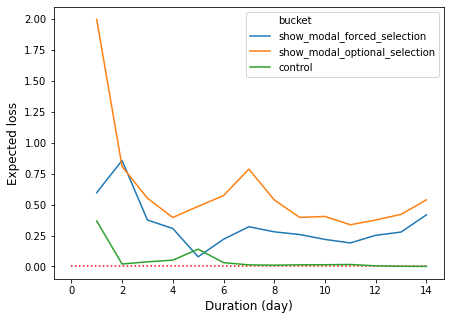

In [189]:
error_thres = 0.0005
fig, ax = plt.subplots(figsize=(7, 5))
_ = sns.lineplot(x='day',y='loss',hue='bucket', data= lossdf, ax=ax)
ax.hlines(error_thres, xmin=0, xmax=14, color='r', linestyles='dotted')
ax.set_ylabel('Expected loss', fontsize= 12)
ax.set_xlabel('Duration (day)', fontsize= 12)

/Users/juersong/miniconda3/lib/python3.7/site-packages/seaborn/relational.py:1656: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Duration (day)')

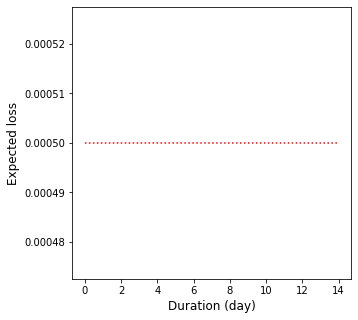

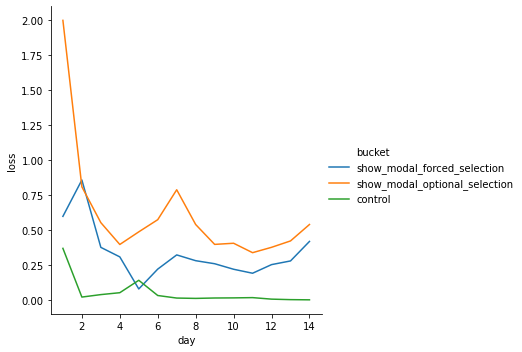

In [186]:
error_thres = 0.0005
fig, ax = plt.subplots(figsize=(5, 5))
_ = sns.relplot(x='day',y='loss',hue='bucket', kind='line', data= lossdf, ax=ax)
ax.hlines(error_thres, xmin=0, xmax=14, color='r', linestyles='dotted')
ax.set_ylabel('Expected loss', fontsize= 12)
ax.set_xlabel('Duration (day)', fontsize= 12)

In [149]:
lossdf

,bucket,loss,day
0,show_modal_forced_selection,0.596521,1
1,show_modal_optional_selection,1.996788,1
2,control,0.367975,1
0,control,0.019955,2
1,show_modal_optional_selection,0.807609,2
2,show_modal_forced_selection,0.856346,2
0,control,0.037562,3
1,show_modal_forced_selection,0.375053,3
2,show_modal_optional_selection,0.551746,3
0,control,0.051132,4


In [190]:
probdf = pd.DataFrame()
day =0
for l in p_stats:
    day +=1
    b, prob = zip(*l)
    d = {'bucket':b,'prob':prob}
    dfi = pd.DataFrame(d)
    dfi['day'] = day
    probdf = pd.concat([probdf,dfi])

Text(0.5, 0, 'Duration (day)')

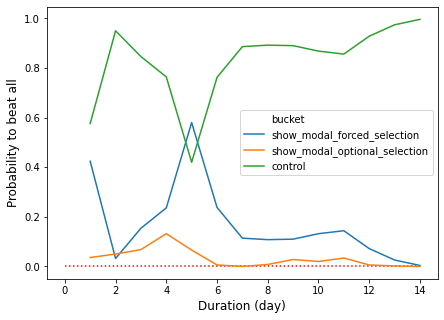

In [192]:
fig, ax = plt.subplots(figsize=(7, 5))
_ = sns.lineplot(x='day',y='prob',hue='bucket', data= probdf, ax=ax)
ax.hlines(error_thres, xmin=0, xmax=14, color='r', linestyles='dotted')
ax.set_ylabel('Probability to beat all', fontsize= 12)
ax.set_xlabel('Duration (day)', fontsize= 12)
